In [32]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

from tkinter import Tk
from tkinter.filedialog import askopenfilename

In [33]:
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
fileType = [('csv files', '*.csv')]
fileName = askopenfilename(initialdir=os.getcwd(), filetypes=fileType)
print(fileName)

df = pd.read_csv(fileName)

D:/程式碼/Pytorch EEG/logs/EEGConformer-fred-v0.1-202303141952/metrics.csv


In [34]:
print(df)

     test_acc  test_loss  epoch  step  train_loss  train_acc  val_acc  \
0       0.220   1.606356      0     0         NaN        NaN      NaN   
1         NaN        NaN      0     9    1.555071        NaN      NaN   
2         NaN        NaN      0    19    1.644499        NaN      NaN   
3         NaN        NaN      0    20         NaN   0.257619      NaN   
4         NaN        NaN      1    29    1.481214        NaN      NaN   
..        ...        ...    ...   ...         ...        ...      ...   
657       NaN        NaN    199  4189    1.071860        NaN      NaN   
658       NaN        NaN    199  4199    0.900330        NaN      NaN   
659       NaN        NaN    199  4199         NaN        NaN     0.44   
660       NaN        NaN    199  4199         NaN   0.624286      NaN   
661     0.508   1.446449    200  4200         NaN        NaN      NaN   

     val_loss  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
..        ...  
657       N

In [35]:
# filter = df['train_loss'] != NaN
dfTrainLoss = df.dropna(subset=['train_loss']).reset_index(drop=True)[['step', 'train_loss']]

dfTrainAcc = df.dropna(subset=['train_acc']).reset_index(drop=True)[['epoch', 'train_acc']]
dfValAcc = df.dropna(subset=['val_acc']).reset_index(drop=True)[['epoch', 'val_acc']]

print(dfTrainLoss)

step = dfTrainLoss['step'].to_numpy(dtype=np.int64)
trainLoss = dfTrainLoss['train_loss'].to_numpy(dtype=np.float32, na_value=0.0)

trainEpoch = dfTrainAcc['epoch'].to_numpy(dtype=np.int64)
trainAcc = dfTrainAcc['train_acc'].to_numpy(dtype=np.float32, na_value=0.0)

valEpoch = dfValAcc['epoch'].to_numpy(dtype=np.int64)
valAcc = dfValAcc['val_acc'].to_numpy(dtype=np.float32, na_value=0.0)

     step  train_loss
0       9    1.555071
1      19    1.644499
2      29    1.481214
3      39    1.502303
4      49    1.358586
..    ...         ...
415  4159    0.884847
416  4169    0.965560
417  4179    0.798473
418  4189    1.071860
419  4199    0.900330

[420 rows x 2 columns]


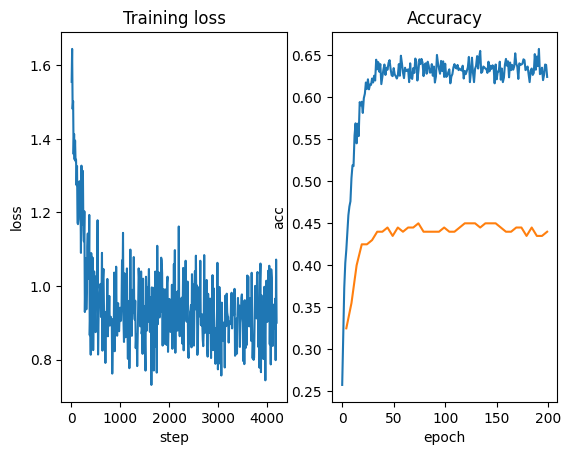

In [38]:
plt.subplot(1, 2, 1)
plt.title("Training loss")
plt.xlabel("step")
plt.ylabel("loss")

plt.plot(step, trainLoss)


plt.subplot(1, 2, 2)
plt.title("Accuracy")
plt.xlabel("epoch")
plt.ylabel("acc")

plt.plot(trainEpoch, trainAcc)
plt.plot(valEpoch, valAcc)

plt.show()